<div style="text-align:center">
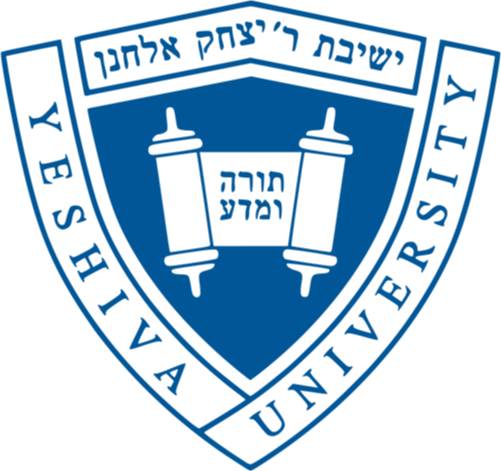
</div>

<h1 style='text-align: center;'>Katz School of Science and Health</h1>
<h1 style='text-align: center;'>AIM 5004 Predictive Models</h1>
<p>
<h2 style='text-align: center;'>Homework 06</h1>
<br><br>

<h3 style='text-align: center;'>Radek Jan Holik</h3>
<br>
<br>

# Package import

In [26]:
# Import some important packages here
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## __1a) Write out lnL(B) for logistic regression. Omit the constant term and use one regressor so that the model has only one parameter, B.__

$$
\ln(L(B)) = \sum_{i=1}^n \left(\frac{1}{1 + e^{-x_i B}}\right)^{y_i} \left(1 - \frac{1}{1 + e^{-x_i B}}\right)^{1 - y_i}
$$

## __1b) Also write it using NumPy in a Python function like "log_likelihood(x,y,B)".__

In [27]:
def logistic_function(x, B):

    p = 1 / (1 + np.exp(-B * x))
    return p

In [28]:
def log_likelihood(x, y, B):

    p = logistic_function(x, B)
    lnL = np.sum( (p**y) * ((1 - p)**(1 - y)))
    return lnL

## __1c) Generate some data__

In [29]:
# Set the random seed for reproducibility
np.random.seed(2023)

In [30]:
# Generate 100 samples
n = 100
x = np.random.uniform(size = (n,))
y = 1 * (x + .1 * np.random.normal(size = (n,)) > .5)

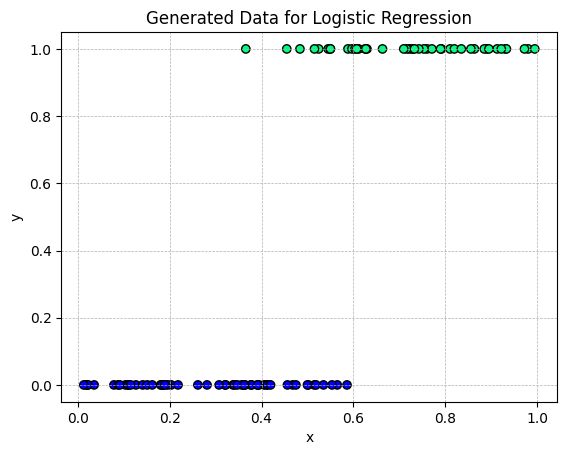

In [31]:
# Plot the synthetic data
plt.scatter(x, y, c = y, cmap = 'winter', edgecolors = 'k')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data for Logistic Regression')
plt.grid(linestyle = '--', linewidth = 0.5)
plt.show()

## __1d) Compute log_likelihood() for many values of B (ex., using np.arange() or np.linspace()) and plot lnL vs. B. Which value of B should you choose as the estimate of beta, the parameter of the model?__

In [32]:
# Values of B from -20 to 20 with the step 0.001
B = np.arange(-20, 20, 0.001)

In [33]:
# Log-likelihood for B values
lnL = [log_likelihood(x, y, b) for b in B]

In [34]:
# The value of B that maximizes the log-likelihood
optimal_B = B[int(np.argwhere(lnL == max(lnL)))]
print(f"Optimal B : {optimal_B:.2f}")

Optimal B : 2.90


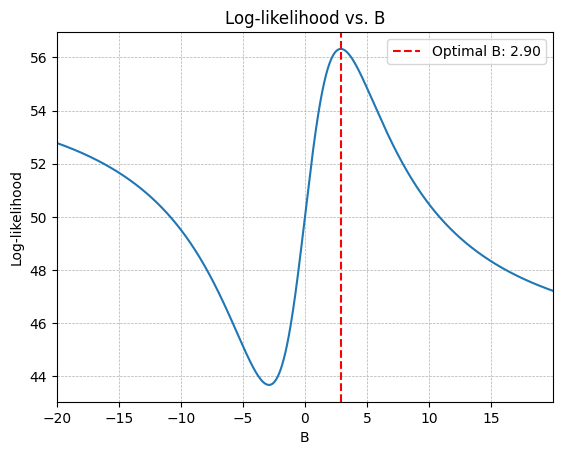

In [35]:
# Plot lnL vs. B
plt.plot(B, lnL)
plt.axvline(optimal_B, color='red', linestyle='--', label = f"Optimal B: {optimal_B:.2f}")
plt.xlabel('B')
plt.ylabel('Log-likelihood')
plt.title('Log-likelihood vs. B')
plt.grid(linestyle = '--', linewidth = 0.5)
plt.xlim([min(B), max(B)])
plt.legend()
plt.show()

#### __Plot data and logistic regression curve with the optimal B__

In [36]:
t = np.arange(min(x) - 1, max(x) + 1, 0.001)
my_log_reg = logistic_function(t, optimal_B)

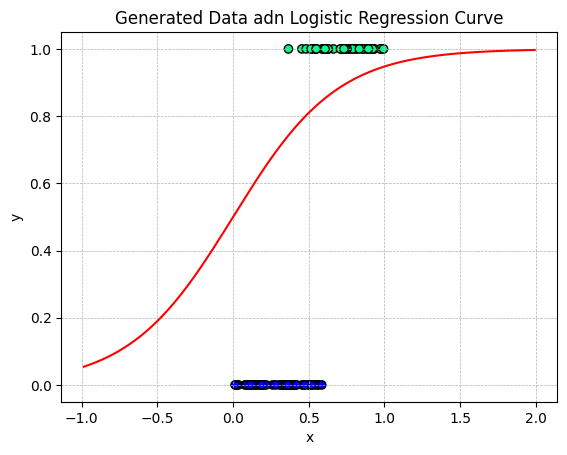

In [37]:
# Plot the synthetic data
plt.scatter(x, y, c = y, cmap = 'winter', edgecolors = 'k')
plt.plot(t, my_log_reg, c = 'r', linewidth = 1.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data adn Logistic Regression Curve')
plt.grid(linestyle = '--', linewidth = 0.5)
# plt.xlim(right=3)
plt.show()

# References

- How to Use the NumPy argmax() Function in Python : https://geekflare.com/numpy-argmax-function-python/

- Choosing Colormaps in Matplotlib : https://matplotlib.org/stable/tutorials/colors/colormaps.html